# Exploración de los datos

In [1]:
# Condicional para pip installs
if 'ALREADY_EXECUTED' not in globals():
    # Necesario para parquet
    !pip -q install pyarrow

    # Librerias varias
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score, precision_score, recall_score
    import torch
    import torch.nn as nn
    import torch.nn.functional as F
    import seaborn as sns

    # Cosillas google drive
    from google.colab import drive
    drive.mount('/content/drive')
    print("This code runs only once.")
    ALREADY_EXECUTED = True
else:
    print("This cell has already been executed in this session.")

Mounted at /content/drive
This code runs only once.


In [2]:
# Se incorporan los 3 dataframes
# Paths
detect_path = '/content/drive/My Drive/Proyecto SN Classifier EL4106/detections_SNe_v7.0.1.csv'
crossmatch_path = '/content/drive/My Drive/Proyecto SN Classifier EL4106/dfcrossmatches_prioritized_v7.0.1.csv'
lc_features_path = '/content/drive/My Drive/Proyecto SN Classifier EL4106/features_cleaned.parquet'

# Dataframes
detect = pd.read_csv(detect_path) # Detecciones ZTF (sirve para gráficos de LC)
crossm = pd.read_csv(crossmatch_path) # Crossmatch con otros catalogos (tiene las labels)
lc_feat = pd.read_parquet(lc_features_path) # Caracteristicas de LC (features para clasificación)


In [3]:
print(f'Dimensiones de la Tabla de Detecciones ZTF: {detect.shape}')
detect

Dimensiones de la Tabla de Detecciones ZTF: (128718, 32)


Unnamed: 0      objectId  fid  isdiffpos  sigmapsf  field  fwhm  \
0                0  ZTF18aahvndq    1        1.0  0.028791    626  3.59   
1                1  ZTF18aahvndq    1        1.0  0.031231    626  2.57   
2                2  ZTF18aahvndq    1        1.0  0.032161    626  1.98   
3                3  ZTF18aahvndq    1        1.0  0.049931    626  2.75   
4                4  ZTF18aahvndq    1        1.0  0.028520    626  3.13   
...            ...           ...  ...        ...       ...    ...   ...   
128713      128713  ZTF19abhduuo    2        1.0  0.110306    348  2.32   
128714      128714  ZTF19abhduuo    2        1.0  0.057063    348  2.81   
128715      128715  ZTF19abhduuo    2        1.0  0.064045    348  1.86   
128716      128716  ZTF19abhduuo    2        1.0  0.075199    348  3.45   
128717      128717  ZTF19abhduuo    2        1.0  0.103586    348  2.03   

              dec     magpsf  rcid  ...  sgscore3   neargaia  sgscore1  \
0       27.008621  15.385100    34  ...   0.50000  78.019280  0.175976   
1       27.008635  15.712121    34  ...   0.50000  78.022800  0.175976   
2       27.008647  16.072975    34  ...   0.50000  78.111310  0.175976   
3       27.008624  17.708502    34  ...   0.50000  78.077545  0.175976   
4       27.008636  15.617474    34  ...   0.50000  78.083150  0.175976   
...           ...        ...   ...  ...       ...        ...       ...   
128713  -9.584920  19.317352    35  ...   0.16369  87.246700  0.500000   
128714  -9.584937  18.340456    35  ...   0.16369  87.167080  0.500000   
128715  -9.584880  18.389997    35  ...   0.16369  87.379220  0.500000   
128716  -9.584910  18.560564    35  ...   0.16369  87.234886  0.500000   
128717  -9.584880  18.914570    35  ...   0.16369  87.371070  0.500000   

                 mjd  corrected  magpsf_corr  sigmapsf_corr  \
0       58991.302095      False          NaN            NaN   
1       59000.260914      False          NaN            NaN   
2       59004.192674      False          NaN            NaN   
3       59021.227604      False          NaN            NaN   
4       58986.223646      False          NaN            NaN   
...              ...        ...          ...            ...   
128713  58735.377546      False          NaN            NaN   
128714  58692.485035      False          NaN            NaN   
128715  58695.462998      False          NaN            NaN   
128716  58704.480220      False          NaN            NaN   
128717  58726.383102      False          NaN            NaN   

        sigmapsf_corr_ext  dubious  has_stamp  
0                     NaN    False       True  
1                     NaN    False       True  
2                     NaN    False       True  
3                     NaN    False       True  
4                     NaN    False       True  
...                   ...      ...        ...  
128713                NaN    False       True  
128714                NaN    False       True  
128715                NaN    False       True  
128716                NaN    False       True  
128717                NaN    False       True  

[128718 rows x 32 columns]

In [4]:
print(f'Dimensiones de la Tabla de Crossmatch: {crossm.shape}')
crossm

Dimensiones de la Tabla de Crossmatch: (173879, 9)


oid classALeRCE          ra        dec       period  \
0       ZTF19abegncu         AGN  357.296363  -8.941186          NaN   
1       ZTF18acejdhu         AGN   11.958444 -10.496615          NaN   
2       ZTF18acdzene         AGN   17.478620 -10.110250          NaN   
3       ZTF18abwzuzw         AGN   25.038255 -10.352430          NaN   
4       ZTF19abmposz         AGN   26.670031  -8.354787          NaN   
...              ...         ...         ...        ...          ...   
173874  ZTF18abikbvc         LPV  286.720222  24.733440          NaN   
173875  ZTF19aamtoyb         LPV   99.257590 -15.567786          NaN   
173876  ZTF19abeesgk         LPV  277.499222 -27.002742          NaN   
173877  ZTF18abnubuy         LPV  292.053754  38.418277          NaN   
173878  ZTF18abgqxlw         LPV  280.809676  12.634607  330.8572533   

           source               id_source          class_source  \
0          Oh2015     5.8772718059579e+17  AGN_galaxy_dominated   
1          Oh2015   5.877272256953059e+17  AGN_galaxy_dominated   
2          Oh2015   5.877271789938934e+17  AGN_galaxy_dominated   
3          Oh2015   5.877272294485526e+17  AGN_galaxy_dominated   
4          Oh2015   5.877271806085038e+17  AGN_galaxy_dominated   
...           ...                     ...                   ...   
173874  GAIADR2VS   4.533629080944307e+18               MIRA_SR   
173875  GAIADR2VS  2.9501070744892713e+18               MIRA_SR   
173876  GAIADR2VS  4.0518162825206625e+18               MIRA_SR   
173877  GAIADR2VS  2.0526959231045647e+18               MIRA_SR   
173878  GAIADR2VS   4.505379156900003e+18               MIRA_SR   

        separation_arcsec  
0                0.243081  
1                0.301126  
2                0.158643  
3                0.485322  
4                0.213990  
...                   ...  
173874           0.299487  
173875           0.299597  
173876           0.299766  
173877           0.299777  
173878           0.119874  

[173879 rows x 9 columns]

In [5]:
print(f'Dimensiones de la Tabla de Características LC: {lc_feat.shape}')
lc_feat

Dimensiones de la Tabla de Características LC: (1823, 179)


oid      gal_b       gal_l  g-r_max_g_r  g-r_mean_g_r  \
0     ZTF18aahvndq  84.778146   32.955580    -0.041541      0.246432   
1     ZTF19abqviuy -56.280179  109.009059    -0.079274      0.021343   
2     ZTF19acyogrm -24.613587  148.867482     1.280889      0.400809   
3     ZTF20aaiovoy  42.559095  209.082699     0.178904      0.587743   
4     ZTF20abcqpdj  72.178184  147.837430     0.308870      0.400827   
...            ...        ...         ...          ...           ...   
1818  ZTF20aayknlo  72.683998  233.184869    -0.328528      0.383010   
1819  ZTF19abiietd  42.921826   38.536144     0.232587      0.466327   
1820  ZTF19abpnsck -49.926751  212.519699    -0.219573     -0.150903   
1821  ZTF18ablqqqp  35.878791   43.288954    -0.100551     -0.033632   
1822  ZTF19abhduuo -66.320027  168.308930     0.860444      1.077799   

      g-r_max_corr_g_r  g-r_mean_corr_g_r        rb  MHPS_ratio_g  MHPS_low_g  \
0                  NaN                NaN  0.882857    254.265274   26.968182   
1                  NaN                NaN  0.930000     75.107750    5.551193   
2             1.227327           0.502450  0.850000      0.314363    0.056313   
3                  NaN                NaN  0.887143     13.142984    1.021393   
4             0.498012           0.541368  0.942857      1.128955    0.027010   
...                ...                ...       ...           ...         ...   
1818               NaN                NaN  0.904286     93.172852   22.056648   
1819          0.262361           0.409922  0.864286     59.030556    4.768975   
1820               NaN                NaN  0.903571     77.930595    8.160241   
1821               NaN                NaN  0.643333           NaN    3.529896   
1822               NaN                NaN  0.942857    383.986755    3.505386   

      ...  GP_DRW_tau_g  GP_DRW_sigma_r  GP_DRW_tau_r  sgscore1  W1-W2  W2-W3  \
0     ...     66.362931        0.759076     27.720122  0.175976    NaN    NaN   
1     ...     53.981530        0.542258     92.358918  0.500000    NaN    NaN   
2     ...      0.069667        0.385131     49.756570  0.332214    NaN    NaN   
3     ...     18.657369        0.026580     25.050218  0.292830    NaN    NaN   
4     ...      6.547652        0.009291     23.891174  0.000000  0.267  4.391   
...   ...           ...             ...           ...       ...    ...    ...   
1818  ...     33.356253        0.674075     23.753157  0.085446    NaN    NaN   
1819  ...     81.268633        0.353625    137.488604  0.158607  0.148  3.874   
1820  ...     47.061616        0.782868    129.075507  0.203339    NaN    NaN   
1821  ...     15.222503        0.218542      9.415108  0.008667    NaN    NaN   
1822  ...     57.588927        0.164409     77.797732  0.500000    NaN    NaN   

          g-W2      g-W3      r-W2      r-W3  
0          NaN       NaN       NaN       NaN  
1          NaN       NaN       NaN       NaN  
2          NaN       NaN       NaN       NaN  
3          NaN       NaN       NaN       NaN  
4     3.883968  8.274968  3.342600  7.733600  
...        ...       ...       ...       ...  
1818       NaN       NaN       NaN       NaN  
1819  3.457589  7.331589  3.047667  6.921667  
1820       NaN       NaN       NaN       NaN  
1821       NaN       NaN       NaN       NaN  
1822       NaN       NaN       NaN       NaN  

[1823 rows x 179 columns]

In [6]:
# Limpieza y arreglo de datos

# Verificación de que los objetos sean únicos
print(f'Objetos Únicos: {lc_feat['oid'].is_unique}')

# Se verifica que todas las columnas son float64
print(f'DataFrame float64: {lc_feat.drop(columns='oid').dtypes.nunique() <= 1}')

# Se verifica la cantidad de valores nulos en la tabla
print(f'Valores nulos: {lc_feat.isnull().sum().sum()}')

# Valores NaN a -999 como en el paper
lc_feat = lc_feat.fillna(-999)

# Union left con labels
lc_feat = pd.merge(lc_feat, crossm[['oid','classALeRCE']], on='oid', how='left')

# Transformar a clases numéricas
species_map = {'SNIa': 0, 'SNIbc': 1, 'SNII': 2, 'SLSN': 3, 'SNIIb': 2, 'SNIIn': 2}
lc_feat['classALeRCE'] = lc_feat['classALeRCE'].map(species_map)

lc_feat

# Codificación one hot
#lc_mlp = lc_feat.drop(columns = 'oid')
#lc_mlp = pd.get_dummies(lc_feat, columns=['classALeRCE'], dtype = float)
#lc_mlp

Objetos Únicos: True
DataFrame float64: True
Valores nulos: 34332


oid      gal_b       gal_l  g-r_max_g_r  g-r_mean_g_r  \
0     ZTF18aahvndq  84.778146   32.955580    -0.041541      0.246432   
1     ZTF19abqviuy -56.280179  109.009059    -0.079274      0.021343   
2     ZTF19acyogrm -24.613587  148.867482     1.280889      0.400809   
3     ZTF20aaiovoy  42.559095  209.082699     0.178904      0.587743   
4     ZTF20abcqpdj  72.178184  147.837430     0.308870      0.400827   
...            ...        ...         ...          ...           ...   
1818  ZTF20aayknlo  72.683998  233.184869    -0.328528      0.383010   
1819  ZTF19abiietd  42.921826   38.536144     0.232587      0.466327   
1820  ZTF19abpnsck -49.926751  212.519699    -0.219573     -0.150903   
1821  ZTF18ablqqqp  35.878791   43.288954    -0.100551     -0.033632   
1822  ZTF19abhduuo -66.320027  168.308930     0.860444      1.077799   

      g-r_max_corr_g_r  g-r_mean_corr_g_r        rb  MHPS_ratio_g  MHPS_low_g  \
0          -999.000000        -999.000000  0.882857    254.265274   26.968182   
1          -999.000000        -999.000000  0.930000     75.107750    5.551193   
2             1.227327           0.502450  0.850000      0.314363    0.056313   
3          -999.000000        -999.000000  0.887143     13.142984    1.021393   
4             0.498012           0.541368  0.942857      1.128955    0.027010   
...                ...                ...       ...           ...         ...   
1818       -999.000000        -999.000000  0.904286     93.172852   22.056648   
1819          0.262361           0.409922  0.864286     59.030556    4.768975   
1820       -999.000000        -999.000000  0.903571     77.930595    8.160241   
1821       -999.000000        -999.000000  0.643333   -999.000000    3.529896   
1822       -999.000000        -999.000000  0.942857    383.986755    3.505386   

      ...  GP_DRW_sigma_r  GP_DRW_tau_r  sgscore1    W1-W2    W2-W3  \
0     ...        0.759076     27.720122  0.175976 -999.000 -999.000   
1     ...        0.542258     92.358918  0.500000 -999.000 -999.000   
2     ...        0.385131     49.756570  0.332214 -999.000 -999.000   
3     ...        0.026580     25.050218  0.292830 -999.000 -999.000   
4     ...        0.009291     23.891174  0.000000    0.267    4.391   
...   ...             ...           ...       ...      ...      ...   
1818  ...        0.674075     23.753157  0.085446 -999.000 -999.000   
1819  ...        0.353625    137.488604  0.158607    0.148    3.874   
1820  ...        0.782868    129.075507  0.203339 -999.000 -999.000   
1821  ...        0.218542      9.415108  0.008667 -999.000 -999.000   
1822  ...        0.164409     77.797732  0.500000 -999.000 -999.000   

            g-W2        g-W3        r-W2        r-W3  classALeRCE  
0    -999.000000 -999.000000 -999.000000 -999.000000            0  
1    -999.000000 -999.000000 -999.000000 -999.000000            0  
2    -999.000000 -999.000000 -999.000000 -999.000000            1  
3    -999.000000 -999.000000 -999.000000 -999.000000            2  
4       3.883968    8.274968    3.342600    7.733600            0  
...          ...         ...         ...         ...          ...  
1818 -999.000000 -999.000000 -999.000000 -999.000000            0  
1819    3.457589    7.331589    3.047667    6.921667            2  
1820 -999.000000 -999.000000 -999.000000 -999.000000            0  
1821 -999.000000 -999.000000 -999.000000 -999.000000            0  
1822 -999.000000 -999.000000 -999.000000 -999.000000            2  

[1823 rows x 180 columns]

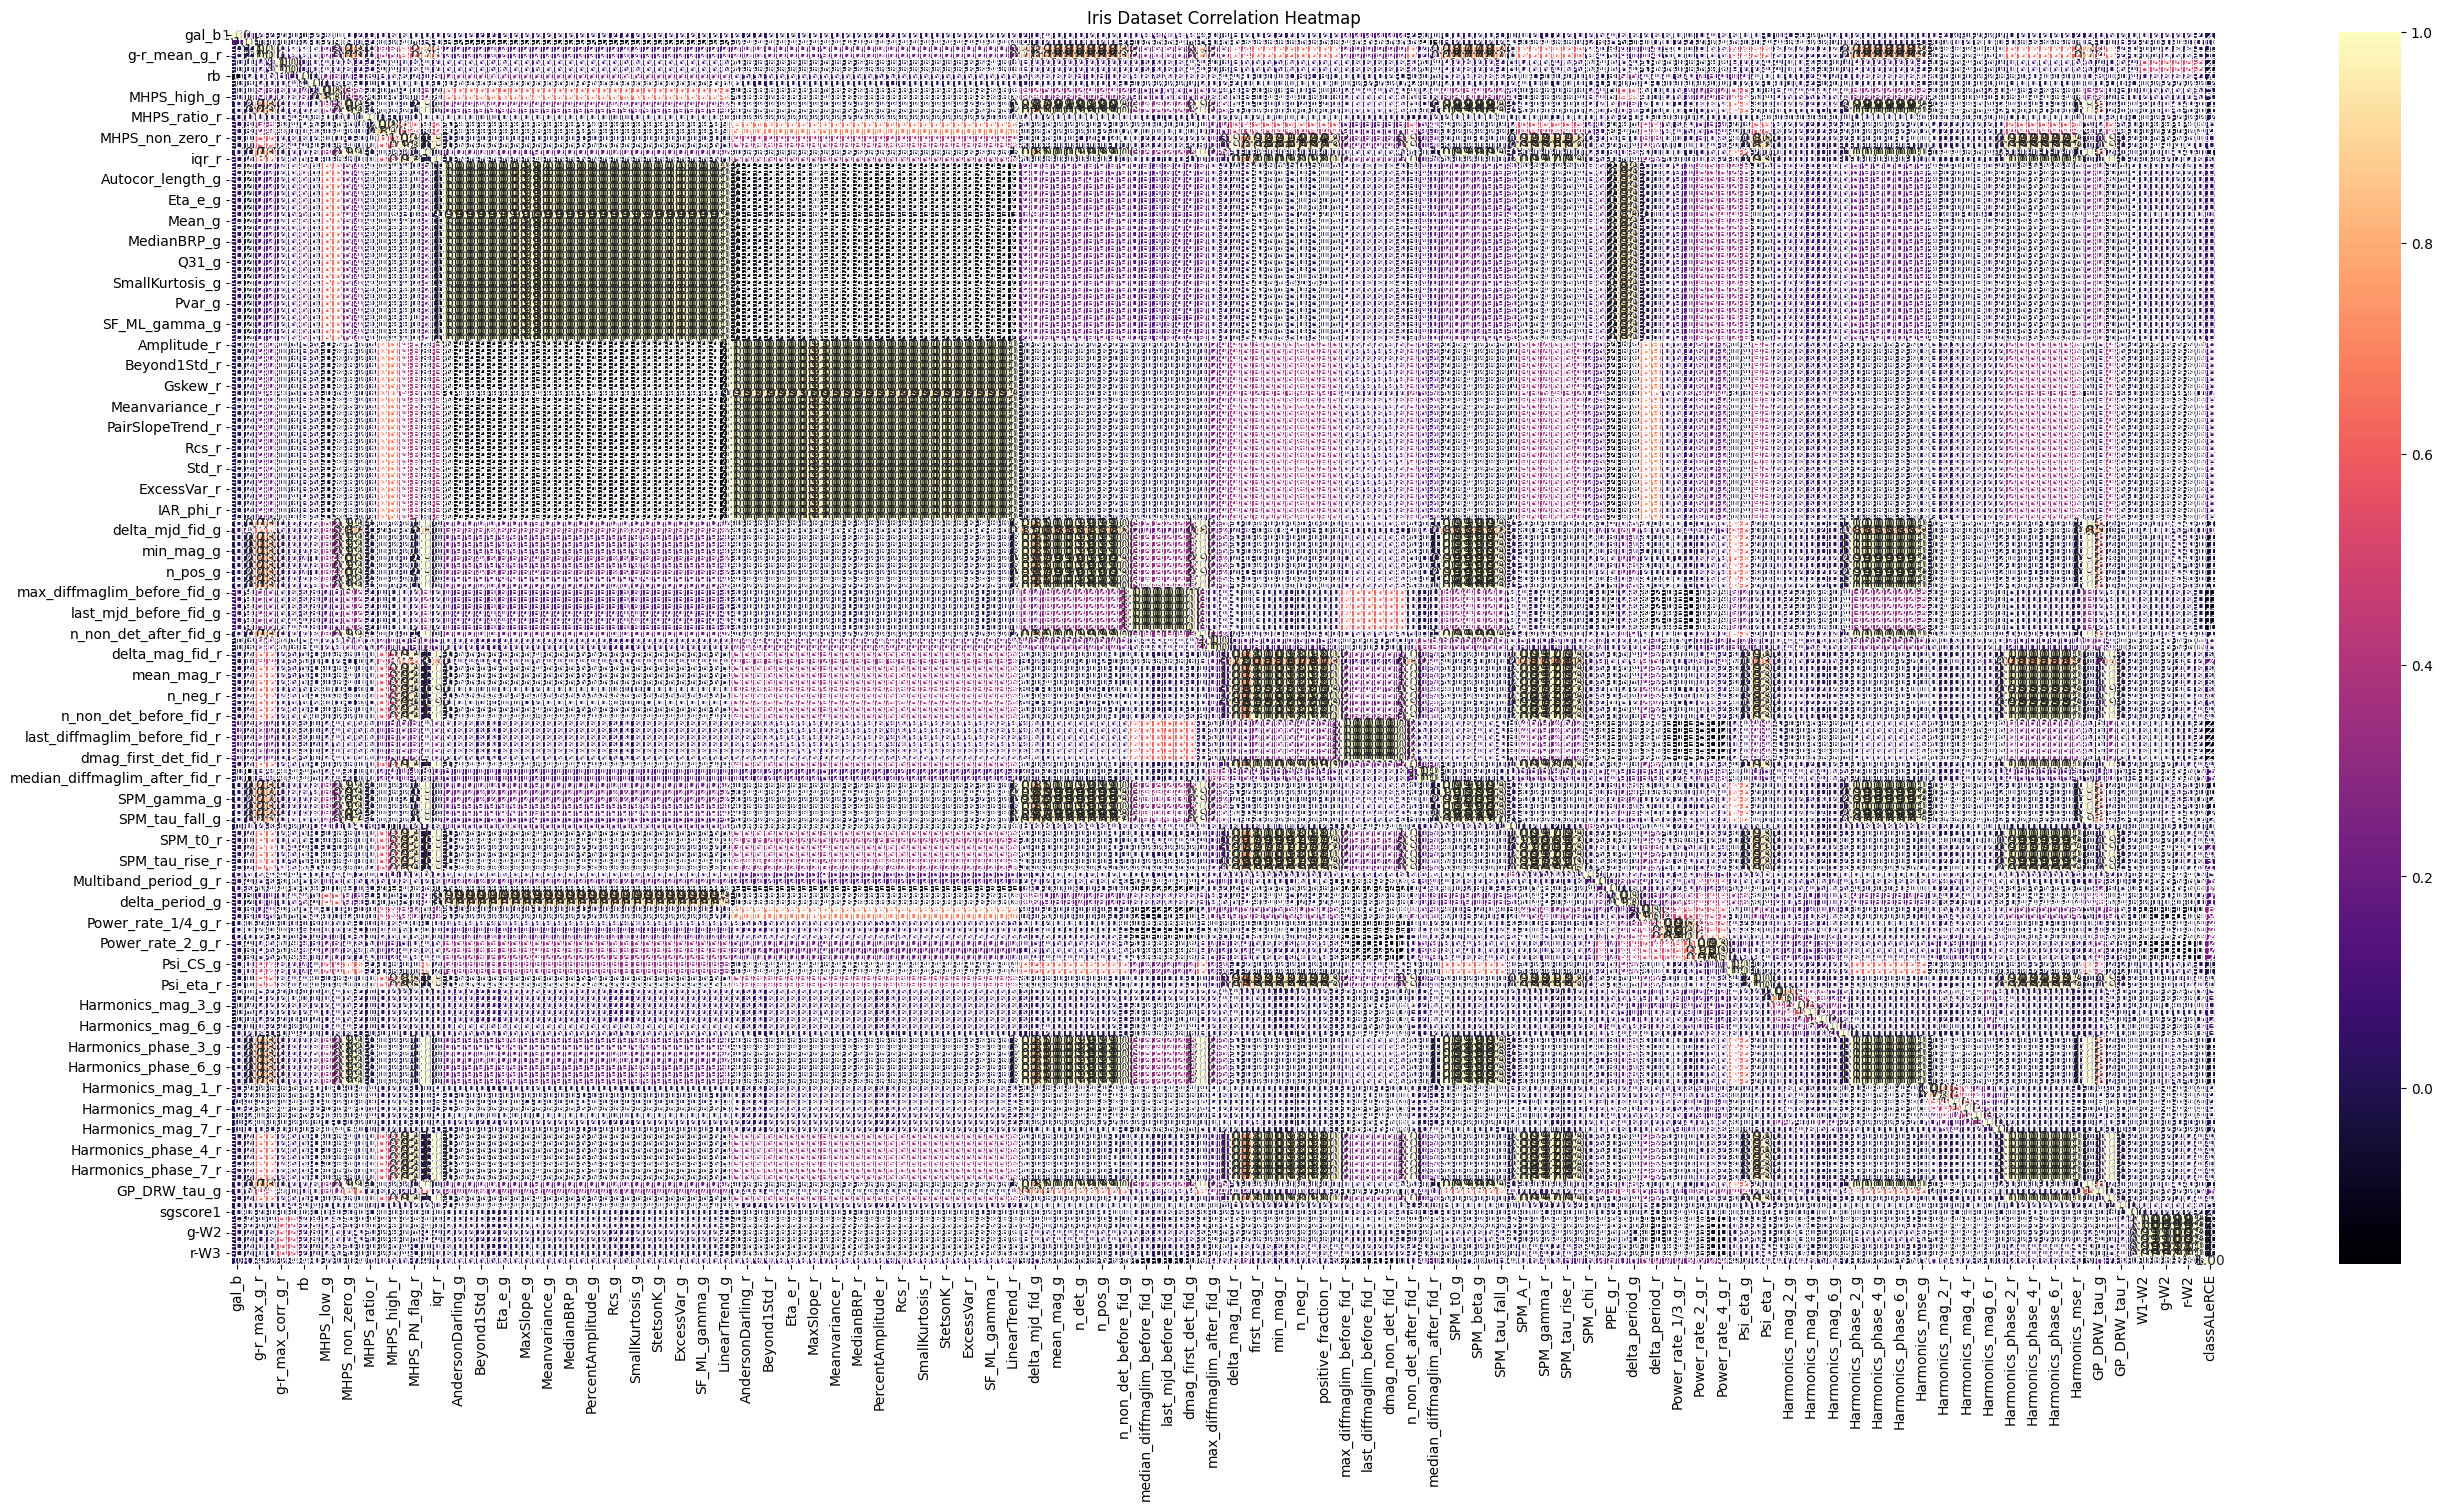

In [7]:
matrix = lc_feat.drop(labels='oid', axis=1).corr()

plt.figure(figsize=(32,16))
sns.heatmap(matrix, annot=True, cmap="magma", fmt=".2f", linewidths=0.5)
plt.title("Iris Dataset Correlation Heatmap")
plt.show()

# MLP con desbalance

In [8]:
# A partir de acá MLP sacada casi todo de Aux 2
# Split the data
X = lc_feat.iloc[:, 1:-1].values
y = lc_feat['classALeRCE'].values
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
y_np = lc_feat['classALeRCE'].to_numpy()
print(f'Numero de clases: {max(y_np) + 1}')

# Random Undersampling
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy= {0: 1100}, random_state=42)
X, y = undersample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversampling usando SMOTE
from imblearn.over_sampling import SMOTE
# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy= {1: 422, 2: 633, 3: 422}, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
#print(train_y)

# Random Oversampling
#from imblearn.over_sampling import RandomOverSampler
#oversample = RandomOverSampler(sampling_strategy= {1: 400, 2:400, 3:400}, random_state=42)
#X, y = oversample.fit_resample(X, y)
#train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

Numero de clases: 4


In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #(≈ 3 lines of code)
        # YOUR CODE STARTS HERE
        self.fc1 = nn.Linear(178, 120)
        self.fc2 = nn.Linear(120, 60)
        self.fc3 = nn.Linear(60, 30)
        self.fc4 = nn.Linear(30, 15)
        self.fc5 = nn.Linear(15,4)

        # YOUR CODE ENDS HERE

    def forward(self, x):
        #(≈ 3 lines of code)
        # YOUR CODE STARTS HERE
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = F.sigmoid(self.fc3(x))
        x = F.sigmoid(self.fc4(x))
        x = self.fc5(x)

        # YOUR CODE ENDS HERE
        return x

In [10]:
# Convert to PyTorch tensors
train_X = torch.FloatTensor(X_train)
test_X = torch.FloatTensor(X_test)
train_y = torch.LongTensor(y_train)
test_y = torch.LongTensor(y_test)

# Initialize the model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Determinar si se usará GPU o CPU
net = Net().to(device)  # Crear una instancia de la red y enviarla al dispositivo seleccionado
# Calculate class weights (inverse of class frequencies)
#from collections import Counter
#counts_tr = Counter(train_y.numpy())
#classes_sorted = sorted(counts_tr)
#freq = np.array([counts_tr[c] for c in classes_sorted], dtype=np.float32)
#alpha = 0.5
#wA = (freq.mean() / (freq ** alpha))
#wA = wA / wA.mean()
# Opcional: limitar extremos
#wA = np.clip(wA, 0.5, 1)  # evita que una clase pese 10x
wA = np.array([1.1,1.3,1.2,1.3])
class_weights_A = torch.tensor(wA, dtype=torch.float32, device=device)
criterion = nn.CrossEntropyLoss(weight=class_weights_A, label_smoothing=0.02)  # Definir la función de pérdida (entropía cruzada para problemas de clasificación)
#criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)  # Usar Adam como optimizador con una tasa de aprendizaje de 0.01

# Bucle de entrenamiento
num_epochs = 1000  # Definir el número de épocas de entrenamiento
for epoch in range(num_epochs):  # Iterar sobre el número de épocas
    net.train()  # Poner la red en modo de entrenamiento
    optimizer.zero_grad()  # Reiniciar los gradientes del optimizador antes de cada paso de optimización
    outputs = net(train_X.to(device))  # Hacer una pasada hacia adelante (forward pass) del modelo con los datos de entrenamiento
    loss = criterion(outputs, train_y.to(device))  # Calcular la pérdida comparando las predicciones con los valores verdaderos
    loss.backward()  # Realizar la pasada hacia atrás (backward pass) para calcular los gradientes dw
    optimizer.step()  # Actualizar los parámetros de la red usando el optimizador

    # Imprimir el progreso cada 100 épocas
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')  # Mostrar la época actual y el valor de la pérdida

# Evaluación del modelo
net.eval()  # Poner la red en modo de evaluación (desactiva dropout, batchnorm, etc.)
with torch.no_grad():  # No calcular los gradientes para la evaluación (reduce el uso de memoria y tiempo de cálculo)
    predict_out = net(test_X.to(device))  # Hacer una pasada hacia adelante con los datos de prueba
    _, predict_y = torch.max(predict_out, 1)  # Obtener las clases predichas usando la salida con mayor probabilidad

# Convertir las predicciones y las etiquetas de prueba a arrays numpy para un análisis posterior
predict_y = predict_y.cpu().numpy()
test_y = test_y.numpy()

print(f'Prediction accuracy: {accuracy_score(test_y, predict_y):.4f}')
print(f'Precision: {precision_score(test_y, predict_y, average="weighted"):.4f}')
print(f'Recall: {recall_score(test_y, predict_y, average="weighted"):.4f}')

Epoch [100/1000], Loss: 1.2963
Epoch [200/1000], Loss: 1.2368
Epoch [300/1000], Loss: 1.2024
Epoch [400/1000], Loss: 1.1403
Epoch [500/1000], Loss: 1.0971
Epoch [600/1000], Loss: 1.0763
Epoch [700/1000], Loss: 1.0546
Epoch [800/1000], Loss: 1.0451
Epoch [900/1000], Loss: 1.0360
Epoch [1000/1000], Loss: 1.0380
Prediction accuracy: 0.6859
Precision: 0.6297
Recall: 0.6859


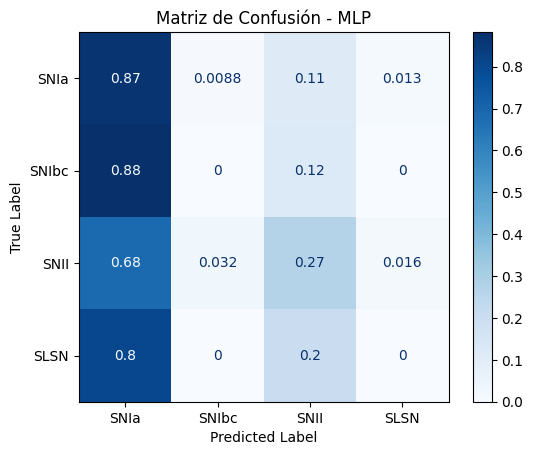

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming test_y and predict_y are your true and predicted labels
cm = confusion_matrix(test_y, predict_y, normalize='true')
label_dict = {'SNIa': 0, 'SNIbc': 1, 'SNII': 2, 'SLSN': 3}
class_names = list(label_dict.keys())
# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)

plt.title('Matriz de Confusión - MLP')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


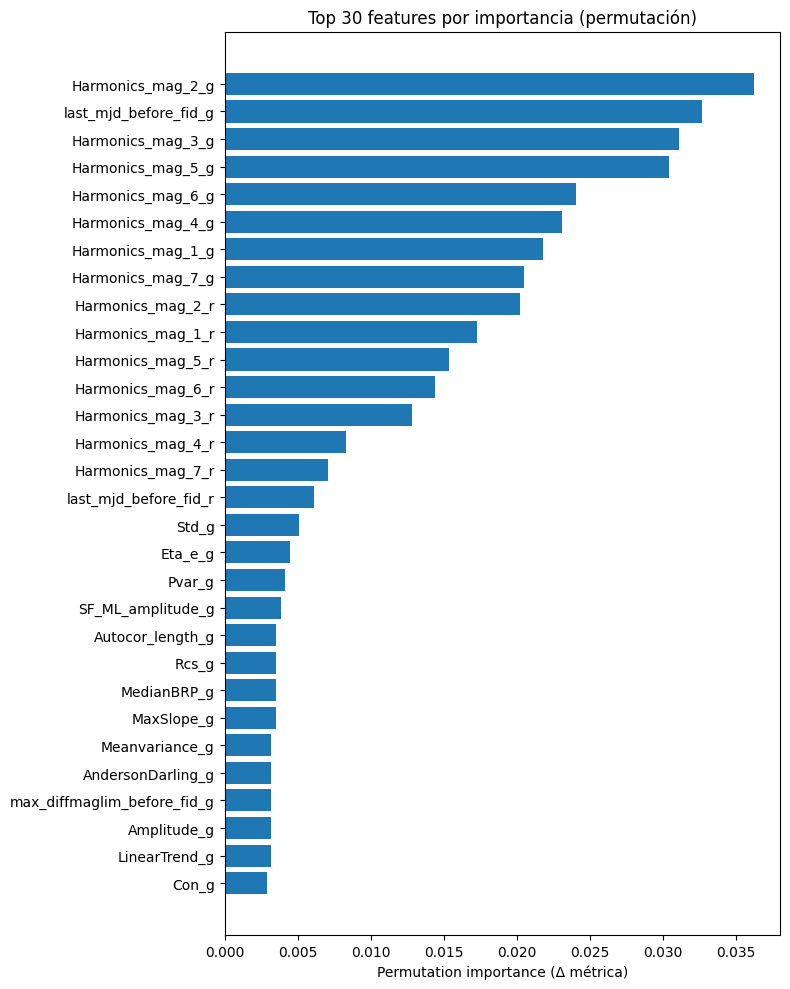

                        feature  importance  abs_importance
0             Harmonics_mag_2_g    0.036218        0.036218
1         last_mjd_before_fid_g    0.032692        0.032692
2             Harmonics_mag_3_g    0.031090        0.031090
3             Harmonics_mag_5_g    0.030449        0.030449
4             Harmonics_mag_6_g    0.024038        0.024038
5             Harmonics_mag_4_g    0.023077        0.023077
6             Harmonics_mag_1_g    0.021795        0.021795
7             Harmonics_mag_7_g    0.020513        0.020513
8             Harmonics_mag_2_r    0.020192        0.020192
9             Harmonics_mag_1_r    0.017308        0.017308
10            Harmonics_mag_5_r    0.015385        0.015385
11            Harmonics_mag_6_r    0.014423        0.014423
12            Harmonics_mag_3_r    0.012821        0.012821
13            Harmonics_mag_4_r    0.008333        0.008333
14            Harmonics_mag_7_r    0.007051        0.007051
15        last_mjd_before_fid_r    0.006

In [12]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

def calculate_permutation_importance(
    model, X_test, y_test, metric_fn=accuracy_score,
    feature_names=None, n_repeats=10, seed=42, device=None
):

    model.eval()
    if device is None:
        device = next(model.parameters()).device

    if isinstance(X_test, np.ndarray):
        X_test_t = torch.from_numpy(X_test).float().to(device)
    elif isinstance(X_test, torch.Tensor):
        X_test_t = X_test.to(device).float()
    else:
        raise TypeError("X_test debe ser numpy.ndarray o torch.Tensor")

    if isinstance(y_test, np.ndarray):
        y_test_t = torch.from_numpy(y_test).long().to(device)
    elif isinstance(y_test, torch.Tensor):
        y_test_t = y_test.to(device).long()
    else:
        raise TypeError("y_test debe ser numpy.ndarray o torch.Tensor")

    with torch.no_grad():
        logits = model(X_test_t)
        y_pred = logits.argmax(1).cpu().numpy()
    y_true = y_test_t.detach().cpu().numpy()
    baseline = metric_fn(y_true, y_pred)

    N, D = X_test_t.shape
    if feature_names is None:
        feature_names = [f"feature_{i}" for i in range(D)]

    rng = torch.Generator(device=device)
    rng.manual_seed(seed)

    importances = np.zeros(D, dtype=np.float32)

    with torch.no_grad():
        for j in range(D):
            drops = []
            for _ in range(n_repeats):
                Xp = X_test_t.clone()
                idx = torch.randperm(N, generator=rng, device=device)
                Xp[:, j] = Xp[idx, j]
                yp = model(Xp).argmax(1).cpu().numpy()
                score_p = metric_fn(y_true, yp)
                drops.append(baseline - score_p)
            importances[j] = float(np.mean(drops))

    df = pd.DataFrame({
        "feature": feature_names,
        "importance": importances,
        "abs_importance": np.abs(importances)
    }).sort_values("importance", ascending=False).reset_index(drop=True)
    return df

device = next(net.parameters()).device
feature_names = lc_feat.columns[1:-1].tolist()
imp_df = calculate_permutation_importance(
    net, test_X, test_y,
    metric_fn=accuracy_score,
    feature_names=feature_names,
    n_repeats=10, seed=42, device=device
)

top_k = 30
top_df = imp_df.head(top_k).copy()
top_df_sorted_for_plot = top_df.sort_values("importance", ascending=True)

plt.figure(figsize=(8, 10))
plt.barh(top_df_sorted_for_plot["feature"], top_df_sorted_for_plot["importance"])
plt.xlabel("Permutation importance (Δ métrica)")
plt.title(f"Top {top_k} features por importancia (permutación)")
plt.tight_layout()
plt.show()

print(top_df)


# Análisis de datos con Random Forest

In [13]:
# A partir de acá MLP sacada casi todo de Aux 2
# Split the data
X = lc_feat.iloc[:, 1:-1].values
y = lc_feat['classALeRCE'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Random Undersampling
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy= {0: 1000}, random_state=42)
X_train, y_train = undersample.fit_resample(X_train, y_train)

# Random Oversampling
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy={1:500, 2:600, 3:500}, random_state=42)
X_train, y_train = oversample.fit_resample(X_train, y_train)



Accuracy: 0.8630  |  Balanced Acc.: 0.5176

Reporte de clasificación:
              precision    recall  f1-score   support

           0     0.8622    0.9853    0.9197       273
           1     1.0000    0.0526    0.1000        19
           2     0.8600    0.6324    0.7288        68
           3     1.0000    0.4000    0.5714         5

    accuracy                         0.8630       365
   macro avg     0.9305    0.5176    0.5800       365
weighted avg     0.8708    0.8630    0.8367       365



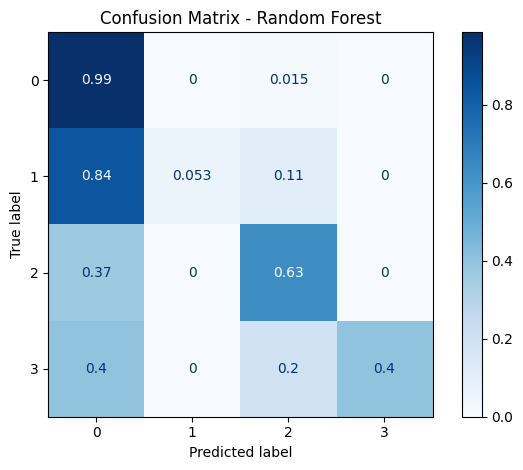

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay)

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    n_jobs=-1,
    class_weight= 'balanced',
    random_state=42
)


rf.fit(X_train, y_train)

pred_y = rf.predict(X_test)

acc = accuracy_score(y_test, pred_y)
bacc = balanced_accuracy_score(y_test, pred_y)
print(f"Accuracy: {acc:.4f}  |  Balanced Acc.: {bacc:.4f}\n")

print("Reporte de clasificación:")
print(classification_report(y_test, pred_y, digits=4))

cm = confusion_matrix(y_test, pred_y, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()

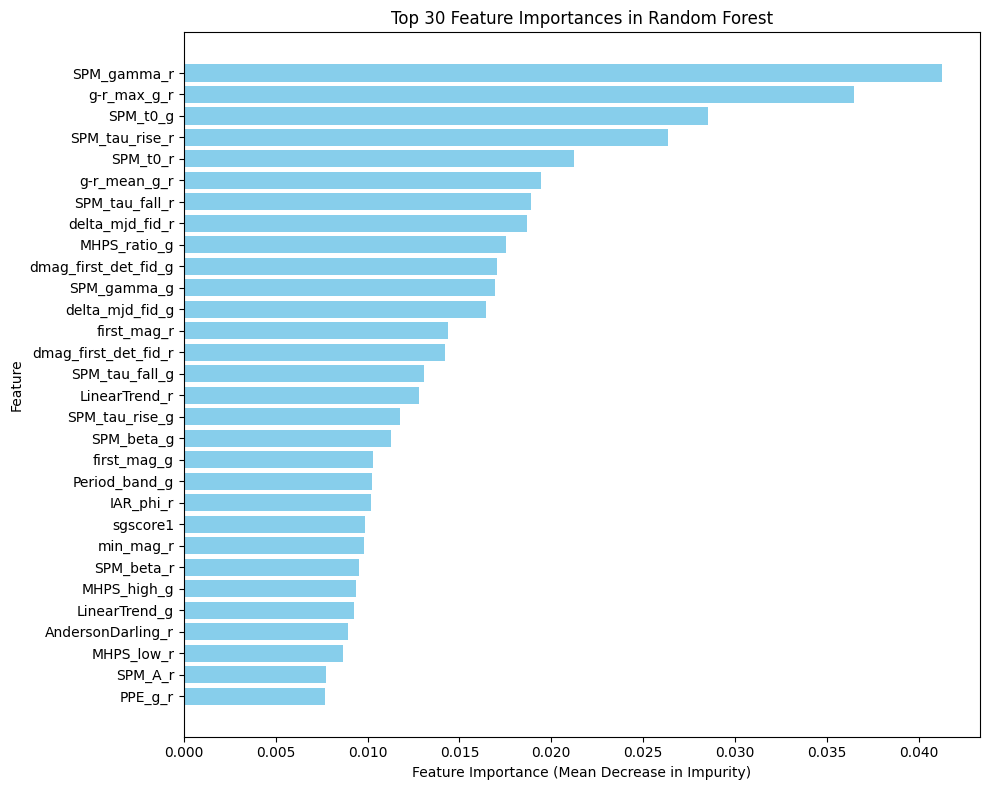

In [15]:
feature_names = lc_feat.drop(columns= ['oid','classALeRCE']).columns

# Importancias
importances = rf.feature_importances_

# Mapeo nombres a dataframe numérico para el plot
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
top_30_features = feature_importance_df.head(30)


plt.figure(figsize=(10, 8))
plt.barh(top_30_features['feature'], top_30_features['importance'], color='skyblue')
plt.xlabel("Feature Importance (Mean Decrease in Impurity)")
plt.ylabel("Feature")
plt.title("Top 30 Feature Importances in Random Forest")
plt.gca().invert_yaxis() # El más importante arriba
plt.tight_layout()
plt.show()


Embeddings: (365, 178), Labels: (365,)


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


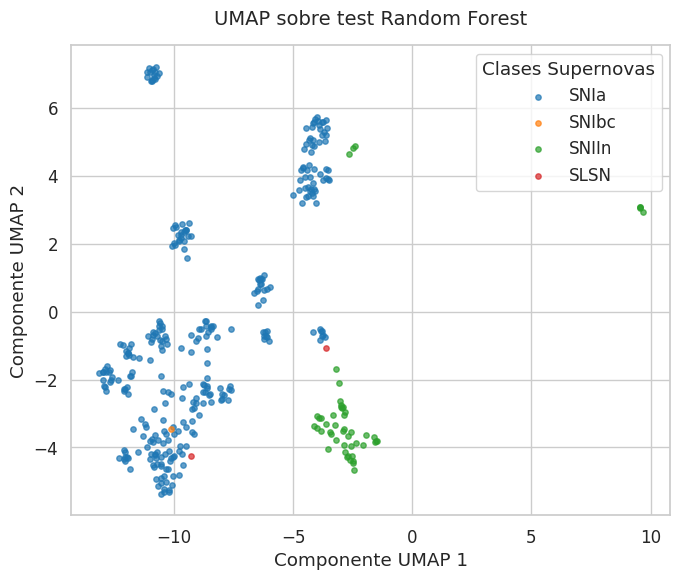

In [16]:
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns

#train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

embeddings = X_test

test_y_np = rf.predict(X_test)

print(f"Embeddings: {embeddings.shape}, Labels: {test_y_np.shape}")

umap = UMAP(
    n_neighbors=30,
    min_dist=0.3,
    n_components=2,
    random_state=42,
    target_metric='categorical'
)
Z_umap = umap.fit_transform(embeddings, y=test_y_np)

plt.figure(figsize=(7,6))
sns.set(style="whitegrid", font_scale=1.1)

species_map = {'SNIa': 0, 'SNIbc': 1, 'SNII': 2, 'SLSN': 3, 'SNIIb': 2, 'SNIIn': 2}
species_inv = {v: k for k, v in species_map.items() if v in [0, 1, 2, 3]}
palette = {
    0: '#1f77b4',  # Azul - SNIa
    1: '#ff7f0e',  # Naranja - SNIbc
    2: '#2ca02c',  # Verde - SNII (incluye IIb, IIn)
    3: '#d62728',  # Rojo - SLSN
}

for class_id, name in species_inv.items():
    mask = (test_y_np == class_id)
    plt.scatter(
        Z_umap[mask, 0],
        Z_umap[mask, 1],
        s=15,
        alpha=0.7,
        color=palette[class_id],
        label=name
    )

plt.title("UMAP sobre test Random Forest", fontsize=14, pad=15)
plt.xlabel("Componente UMAP 1")
plt.ylabel("Componente UMAP 2")
plt.legend(title="Clases Supernovas", loc="best", frameon=True)
plt.tight_layout()
plt.show()


In [17]:
# RANDOM FOREST TIENE EL MEJOR DESEMPEÑO SIMILAR A DOCUMENTO ALeRCE

# Análisis con Balanced Random Forest

In [18]:
# A partir de acá MLP sacada casi todo de Aux 2
# Split the data
X = lc_feat.iloc[:, 1:-1].values
y = lc_feat['classALeRCE'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# En este caso sin balanceo previo para no modificar demasiado
# e introducir ruido

Accuracy: 0.7260  |  Balanced Acc.: 0.5971

Reporte de clasificación:
              precision    recall  f1-score   support

           0     0.9095    0.7729    0.8356       273
           1     0.1129    0.3684    0.1728        19
           2     0.7333    0.6471    0.6875        68
           3     0.2727    0.6000    0.3750         5

    accuracy                         0.7260       365
   macro avg     0.5071    0.5971    0.5177       365
weighted avg     0.8265    0.7260    0.7672       365



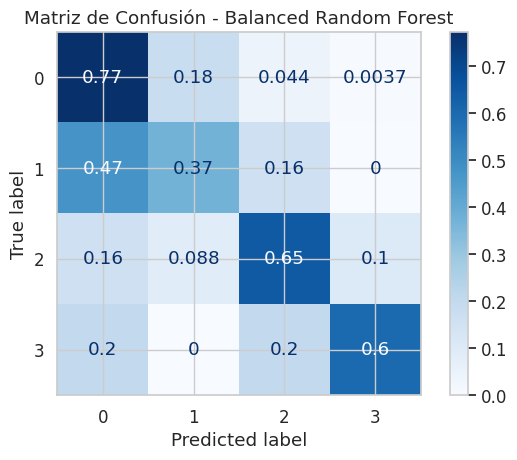

In [19]:
from imblearn.ensemble import BalancedRandomForestClassifier

clf = BalancedRandomForestClassifier(n_estimators=300,
    sampling_strategy="all", replacement=True, max_depth=None, random_state=0,
    bootstrap=False)

clf.fit(X_train, y_train)

pred_y = clf.predict(X_test)

acc = accuracy_score(y_test, pred_y)
bacc = balanced_accuracy_score(y_test, pred_y)
print(f"Accuracy: {acc:.4f}  |  Balanced Acc.: {bacc:.4f}\n")

print("Reporte de clasificación:")
print(classification_report(y_test, pred_y, digits=4))

cm = confusion_matrix(y_test, pred_y, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Balanced Random Forest")
plt.tight_layout()
plt.show()

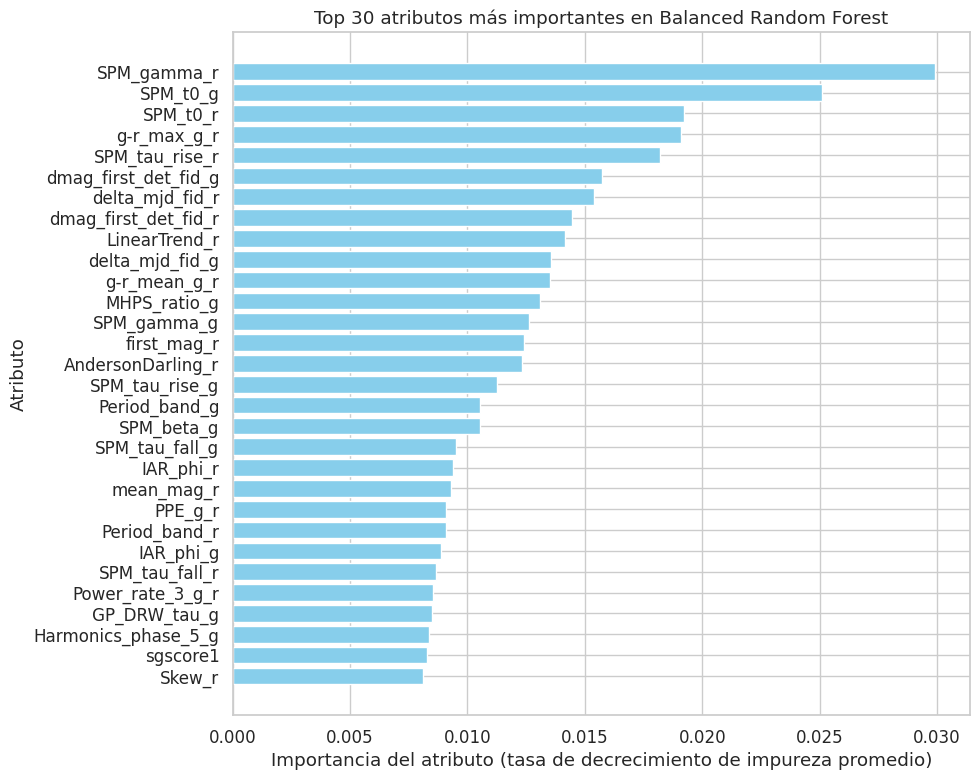

In [20]:
feature_names = lc_feat.drop(columns= ['oid','classALeRCE']).columns

# Importancias
importances = clf.feature_importances_

# Mapeo nombres a dataframe numérico para el plot
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
top_30_features = feature_importance_df.head(30)


plt.figure(figsize=(10, 8))
plt.barh(top_30_features['feature'], top_30_features['importance'], color='skyblue')
plt.xlabel("Importancia del atributo (tasa de decrecimiento de impureza promedio)")
plt.ylabel("Atributo")
plt.title("Top 30 atributos más importantes en Balanced Random Forest")
plt.gca().invert_yaxis() # El más importante arriba
plt.tight_layout()
plt.show()


In [21]:
filter = feature_importance_df.iloc[:, 0].values.tolist()

Embeddings: (365, 178), Labels: (365,)


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


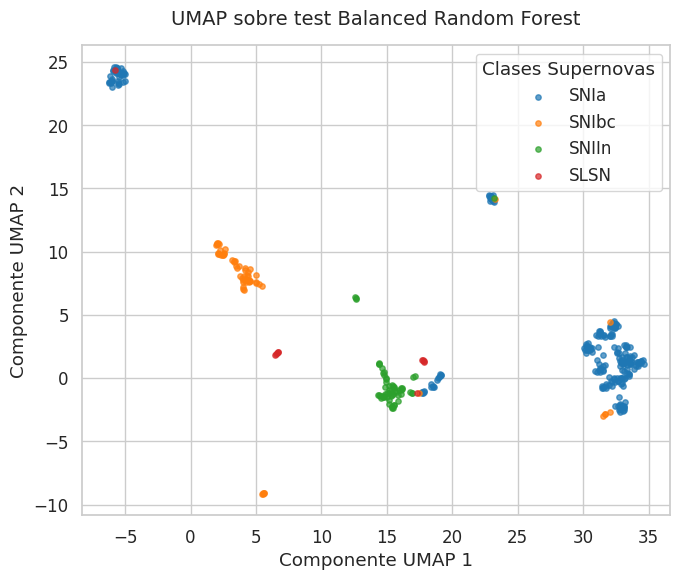

In [22]:
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns

#train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

embeddings = X_test

test_y_np = clf.predict(X_test)

print(f"Embeddings: {embeddings.shape}, Labels: {test_y_np.shape}")

umap = UMAP(
    n_neighbors=30,
    min_dist=0.3,
    n_components=2,
    random_state=42,
    target_metric='categorical'
)
Z_umap = umap.fit_transform(embeddings, y=test_y_np)

plt.figure(figsize=(7,6))
sns.set(style="whitegrid", font_scale=1.1)

species_map = {'SNIa': 0, 'SNIbc': 1, 'SNII': 2, 'SLSN': 3, 'SNIIb': 2, 'SNIIn': 2}
species_inv = {v: k for k, v in species_map.items() if v in [0, 1, 2, 3]}
palette = {
    0: '#1f77b4',  # Azul - SNIa
    1: '#ff7f0e',  # Naranja - SNIbc
    2: '#2ca02c',  # Verde - SNII (incluye IIb, IIn)
    3: '#d62728',  # Rojo - SLSN
}

for class_id, name in species_inv.items():
    mask = (test_y_np == class_id)
    plt.scatter(
        Z_umap[mask, 0],
        Z_umap[mask, 1],
        s=15,
        alpha=0.7,
        color=palette[class_id],
        label=name
    )

plt.title("UMAP sobre test Balanced Random Forest", fontsize=14, pad=15)
plt.xlabel("Componente UMAP 1")
plt.ylabel("Componente UMAP 2")
plt.legend(title="Clases Supernovas", loc="best", frameon=True)
plt.tight_layout()
plt.show()


# Balanced Random Forest optimizado

In [23]:
filter = ['oid'] + feature_importance_df.iloc[:, 0].values.tolist()[0:60] + ['classALeRCE']
lc_filtered = lc_feat[filter]
# Union left con labels
lc_filtered

oid  SPM_gamma_r   SPM_t0_g   SPM_t0_r  g-r_max_g_r  \
0     ZTF18aahvndq    51.626005  -8.683957  -4.190406    -0.041541   
1     ZTF19abqviuy     4.486223   1.705343   4.833134    -0.079274   
2     ZTF19acyogrm    26.541169   2.975497   4.144363     1.280889   
3     ZTF20aaiovoy    96.901346   2.962453  -0.540365     0.178904   
4     ZTF20abcqpdj    24.053781   5.718406   1.320411     0.308870   
...            ...          ...        ...        ...          ...   
1818  ZTF20aayknlo    33.252932  -6.616252   3.675580    -0.328528   
1819  ZTF19abiietd    58.820636 -20.564079  -9.171115     0.232587   
1820  ZTF19abpnsck    11.478250 -17.145474  -9.016146    -0.219573   
1821  ZTF18ablqqqp    29.021104  -5.513459   5.295727    -0.100551   
1822  ZTF19abhduuo    51.543939 -13.752755 -17.731321     0.860444   

      SPM_tau_rise_r  dmag_first_det_fid_g  delta_mjd_fid_r  \
0          33.254747              1.743533        66.918588   
1           4.856173              1.328379        60.822778   
2           2.705224              0.181900        65.897951   
3           4.128178              0.139400       112.879896   
4           4.427055              2.788353        40.968623   
...              ...                   ...              ...   
1818        2.199506              3.019142        58.946157   
1819       34.404399              5.141459       158.382176   
1820       10.549754           -999.000000        45.878542   
1821        3.370948              0.448520        37.908808   
1822       61.799763             -0.137700        53.895451   

      dmag_first_det_fid_r  LinearTrend_r  ...  Harmonics_phase_2_g  \
0                -0.309911       0.021631  ...             2.315523   
1                 0.469740       0.023122  ...             4.919587   
2                 0.831920       0.023859  ...             0.027284   
3                 0.856727       0.002114  ...             3.144870   
4                 3.390217       0.006388  ...             4.332470   
...                    ...            ...  ...                  ...   
1818              3.039227       0.024019  ...             0.786462   
1819              5.138253       0.010254  ...             2.450000   
1820           -999.000000       0.043314  ...             0.207934   
1821             -0.083275      -0.007545  ...             4.707567   
1822              1.008464       0.018755  ...             0.276207   

      mean_mag_g  n_pos_g  dmag_non_det_fid_g      Skew_g     Q31_r  \
0      16.971390     17.0            5.369300   -0.168772  1.417576   
1      18.804611     14.0            2.655898    0.535911  0.620458   
2      19.141043      5.0            1.021376 -999.000000  0.847463   
3      19.585388     16.0            1.644651    0.733100  0.243165   
4      17.741968      7.0            3.299868    0.579323  0.152819   
...          ...      ...                 ...         ...       ...   
1818   17.264259     13.0            5.138644   -0.330223  1.041246   
1819   15.760589     18.0            5.658725   -0.223912  0.776765   
1820   18.301250      6.0         -999.000000    0.415900  0.969353   
1821   19.257640      4.0            1.369333 -999.000000  0.450779   
1822   19.773180      9.0            0.346500    0.616317  0.390922   

      LinearTrend_g  Beyond1Std_r  Harmonics_phase_4_g  classALeRCE  
0          0.051990      0.375000             1.484518            0  
1          0.062196      0.250000             2.079058            0  
2       -999.000000      0.400000             2.911679            1  
3          0.008652      0.217391             3.149504            2  
4         -0.003385      0.416667             1.289189            0  
...             ...           ...                  ...          ...  
1818       0.047556      0.333333             6.057586            0  
1819       0.009446      0.400000             0.683248            2  
1820       0.086526      0.333333             2.197382            0  
1821    -99

In [24]:
# A partir de acá MLP sacada casi todo de Aux 2
# Split the data
X = lc_feat.iloc[:, 1:-1].values
y = lc_feat['classALeRCE'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# En este caso sin balanceo previo para no modificar demasiado
# e introducir ruido

Accuracy: 0.6932  |  Balanced Acc.: 0.7043

Reporte de clasificación:
              precision    recall  f1-score   support

           0     0.9381    0.7216    0.8157       273
           1     0.1795    0.7368    0.2887        19
           2     0.6786    0.5588    0.6129        68
           3     0.1905    0.8000    0.3077         5

    accuracy                         0.6932       365
   macro avg     0.4967    0.7043    0.5062       365
weighted avg     0.8400    0.6932    0.7436       365



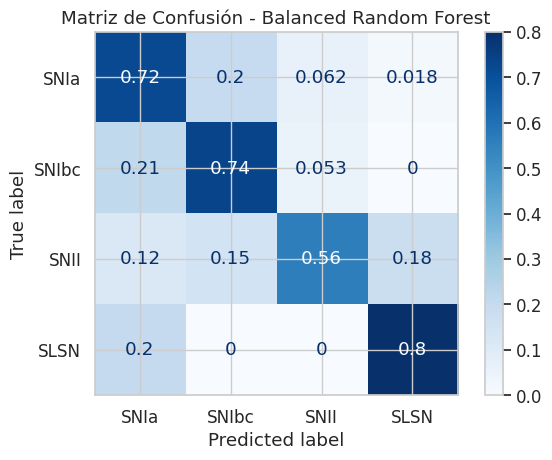

In [25]:
from imblearn.ensemble import BalancedRandomForestClassifier

clf = BalancedRandomForestClassifier(n_estimators=500,
    sampling_strategy="auto", replacement=False, min_samples_split=2, min_samples_leaf=2,
    max_features=0.5, max_depth=50, random_state=42,
    bootstrap=True)

clf.fit(X_train, y_train)

pred_y = clf.predict(X_test)

acc = accuracy_score(y_test, pred_y)
bacc = balanced_accuracy_score(y_test, pred_y)
print(f"Accuracy: {acc:.4f}  |  Balanced Acc.: {bacc:.4f}\n")

print("Reporte de clasificación:")
print(classification_report(y_test, pred_y, digits=4))

label_dict = {'SNIa': 0, 'SNIbc': 1, 'SNII': 2, 'SLSN': 3}
class_names = list(label_dict.keys())

cm = confusion_matrix(y_test, pred_y, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Balanced Random Forest")
plt.tight_layout()
plt.show()

A continuacion un codigo de busqueda de hiperparametros que demora bastante:


 Evaluando top-170 features...
Balanced Accuracy: 0.6942 | Mejores parámetros: {'sampling_strategy': 'auto', 'replacement': False, 'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 50, 'bootstrap': False}

 Evaluando top-160 features...
Balanced Accuracy: 0.7175 | Mejores parámetros: {'sampling_strategy': 'auto', 'replacement': False, 'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': None, 'bootstrap': True}

 Evaluando top-150 features...
Balanced Accuracy: 0.6887 | Mejores parámetros: {'sampling_strategy': 'auto', 'replacement': False, 'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 0.5, 'max_depth': 20, 'bootstrap': False}

 Evaluando top-140 features...
Balanced Accuracy: 0.6961 | Mejores parámetros: {'sampling_strategy': 'auto', 'replacement': False, 'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.5, 'max

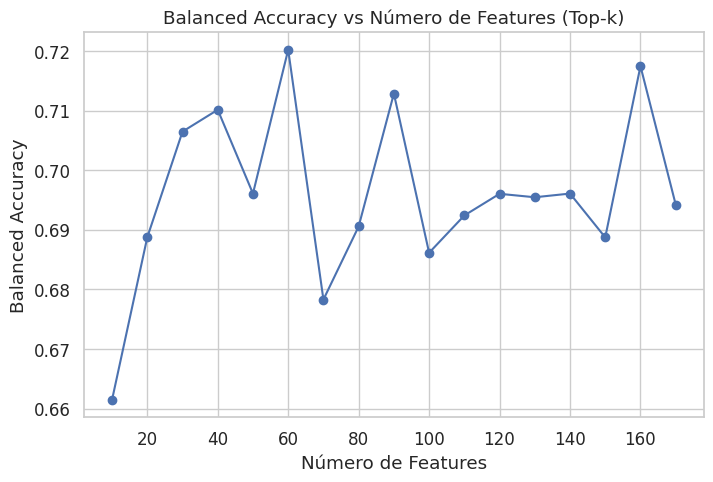


Top-5 configuraciones:


k_features  best_bacc                                        best_params
11          60   0.720224  {'sampling_strategy': 'auto', 'replacement': F...
1          160   0.717477  {'sampling_strategy': 'auto', 'replacement': F...
8           90   0.712872  {'sampling_strategy': 'auto', 'replacement': F...
13          40   0.710151  {'sampling_strategy': 'auto', 'replacement': F...
14          30   0.706488  {'sampling_strategy': 'auto', 'replacement': F...

In [41]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import make_scorer

feature_ranking = feature_importance_df.iloc[:, 0].values.tolist()
y = lc_feat['classALeRCE'].values

param_grid = {
    'n_estimators': [100, 300, 500, 800],
    'max_depth': [None, 10, 20, 30, 50],
    'max_features': ['sqrt', 'log2', 0.3, 0.5, 0.8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'replacement': [True, False],
    'sampling_strategy': ['auto', 'all'],
    'bootstrap': [False, True]
}

scorer = make_scorer(balanced_accuracy_score)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []

for k in range(170, 9, -10):  # desde 170 hasta 10 features, paso de -10
    print(f"\n Evaluando top-{k} features...")

    selected_features = ['oid'] + feature_ranking[:k] + ['classALeRCE']
    subset = lc_feat[selected_features]
    X = subset.iloc[:, 1:-1].values  # eliminar 'oid' y 'classALeRCE'

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    search = RandomizedSearchCV(
        BalancedRandomForestClassifier(random_state=42),
        param_distributions=param_grid,
        n_iter=25,
        scoring=scorer,
        n_jobs=-1,
        cv=cv,
        random_state=42,
        verbose=0
    )

    search.fit(X_train, y_train)

    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test)
    bacc = balanced_accuracy_score(y_test, y_pred)

    results.append({
        'k_features': k,
        'best_bacc': bacc,
        'best_params': search.best_params_
    })

    print(f"Balanced Accuracy: {bacc:.4f} | Mejores parámetros: {search.best_params_}")

# Plot de resumen
df_results = pd.DataFrame(results)
plt.figure(figsize=(8,5))
plt.plot(df_results['k_features'], df_results['best_bacc'], marker='o')
plt.title("Balanced Accuracy vs Número de Features (Top-k)")
plt.xlabel("Número de Features")
plt.ylabel("Balanced Accuracy")
plt.grid(True)
plt.show()

# Mostrar top-5 configuraciones
print("\nTop-5 configuraciones:")
display(df_results.sort_values('best_bacc', ascending=False).head())


Embeddings: (365, 178), Labels: (365,)


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


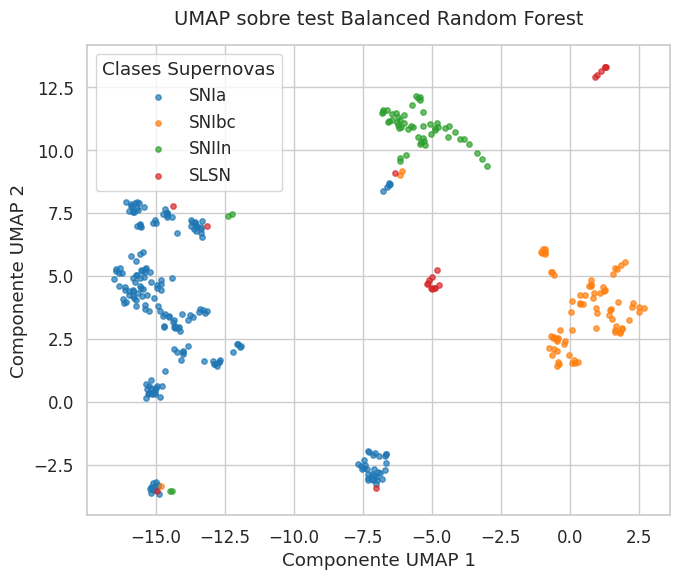

In [26]:
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns

#train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

embeddings = X_test

test_y_np = clf.predict(X_test)

print(f"Embeddings: {embeddings.shape}, Labels: {test_y_np.shape}")

umap = UMAP(
    n_neighbors=30,
    min_dist=0.3,
    n_components=2,
    random_state=42,
    target_metric='categorical'
)
Z_umap = umap.fit_transform(embeddings, y=test_y_np)

plt.figure(figsize=(7,6))
sns.set(style="whitegrid", font_scale=1.1)

species_map = {'SNIa': 0, 'SNIbc': 1, 'SNII': 2, 'SLSN': 3, 'SNIIb': 2, 'SNIIn': 2}
species_inv = {v: k for k, v in species_map.items() if v in [0, 1, 2, 3]}
palette = {
    0: '#1f77b4',  # Azul - SNIa
    1: '#ff7f0e',  # Naranja - SNIbc
    2: '#2ca02c',  # Verde - SNII (incluye IIb, IIn)
    3: '#d62728',  # Rojo - SLSN
}

for class_id, name in species_inv.items():
    mask = (test_y_np == class_id)
    plt.scatter(
        Z_umap[mask, 0],
        Z_umap[mask, 1],
        s=15,
        alpha=0.7,
        color=palette[class_id],
        label=name
    )

plt.title("UMAP sobre test Balanced Random Forest", fontsize=14, pad=15)
plt.xlabel("Componente UMAP 1")
plt.ylabel("Componente UMAP 2")
plt.legend(title="Clases Supernovas", loc="best", frameon=True)
plt.tight_layout()
plt.show()


# Multiclass SVDD

In [27]:
!pip install umap-learn

In [28]:
# A partir de acá MLP sacada casi todo de Aux 2
# Split the data
X = lc_feat.iloc[:, 1:-1].values
y = lc_feat['classALeRCE'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Luego aplica balanceo solo en entrenamiento
undersample = RandomUnderSampler(sampling_strategy={0:800}, random_state=42)
X_train, y_train = undersample.fit_resample(X_train, y_train)

oversample = RandomOverSampler(sampling_strategy={1:500, 2:600, 3:500}, random_state=42)
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [29]:
import torch.nn as nn
import torch.nn.functional as F

class MLPEncoder(nn.Module):
    def __init__(self, input_dim=178, hidden_dims=(256, 128),
                 embed_dim=32, num_classes=4):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dims[0]),
            nn.BatchNorm1d(hidden_dims[0]),
            nn.ReLU(),
            nn.Dropout(0.1),

            nn.Linear(hidden_dims[0], hidden_dims[1]),
            nn.BatchNorm1d(hidden_dims[1]),
            nn.ReLU(),
            nn.Dropout(0.1),

            nn.Linear(hidden_dims[1], embed_dim)
        )
        self.classifier = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        z = self.encoder(x)
        out = self.classifier(z)
        return out, z

In [30]:
class CenterLoss(nn.Module):
    def __init__(self, num_classes, feat_dim, lambda_c=1):
        super().__init__()
        self.centers = nn.Parameter(torch.randn(num_classes, feat_dim))
        self.lambda_c = lambda_c

    def forward(self, features, labels):
        centers_batch = self.centers[labels]
        loss = torch.mean((features - centers_batch) ** 2)
        return self.lambda_c * loss

In [31]:
def focal_loss(logits, targets, alpha=None, gamma=2.0):
    ce = F.cross_entropy(logits, targets, reduction='none', weight=alpha)
    pt = torch.exp(-ce)
    return ((1 - pt) ** gamma * ce).mean()

In [32]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import f1_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLPEncoder().to(device)

classes = np.unique(y_train)
weights = compute_class_weight('balanced', classes=classes, y=y_train)
weights = torch.tensor(weights, dtype=torch.float32).to(device)

criterion_cls = lambda logits, y: focal_loss(logits, y, alpha=weights, gamma=1.5)
criterion_center = CenterLoss(num_classes=4, feat_dim=32, lambda_c=0.1).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)

train_X_t = torch.FloatTensor(X_train).to(device)
train_y_t = torch.LongTensor(y_train).to(device)
test_X_t = torch.FloatTensor(X_test).to(device)
test_y_t = torch.LongTensor(y_test).to(device)

best_f1 = 0
for epoch in range(700):
    model.train()
    optimizer.zero_grad()
    out, z = model(train_X_t)
    loss_cls = criterion_cls(out, train_y_t)
    loss_center = criterion_center(z, train_y_t)
    loss = loss_cls + loss_center
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        model.eval()
        with torch.no_grad():
            preds, z_val = model(test_X_t)
            y_pred = preds.argmax(1)
            f1 = f1_score(test_y_t.cpu(), y_pred.cpu(), average='macro')
        print(f"Epoch {epoch} | Loss={loss.item():.3f} | Macro-F1={f1:.3f} | Center={loss_center.item():.3f}")
        if f1 > best_f1:
            best_f1 = f1

Epoch 0 | Loss=1.129 | Macro-F1=0.254 | Center=0.129
Epoch 100 | Loss=0.735 | Macro-F1=0.101 | Center=0.091
Epoch 200 | Loss=0.595 | Macro-F1=0.139 | Center=0.084
Epoch 300 | Loss=0.500 | Macro-F1=0.251 | Center=0.081
Epoch 400 | Loss=0.448 | Macro-F1=0.280 | Center=0.075
Epoch 500 | Loss=0.388 | Macro-F1=0.296 | Center=0.071
Epoch 600 | Loss=0.339 | Macro-F1=0.292 | Center=0.068


Embeddings: (365, 32), Labels: (365,)


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


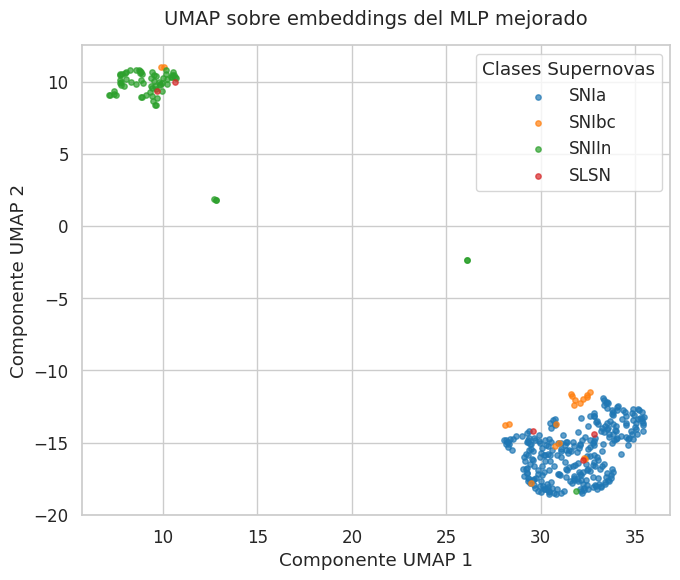

In [33]:
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns


with torch.no_grad():
    model.eval()
    _, embeddings = model(test_X_t)
    embeddings = embeddings.cpu().numpy()

test_y_np = test_y_t.cpu().numpy()

print(f"Embeddings: {embeddings.shape}, Labels: {test_y_np.shape}")

umap = UMAP(
    n_neighbors=30,
    min_dist=0.3,
    n_components=2,
    random_state=42,
    target_metric='categorical'
)
Z_umap = umap.fit_transform(embeddings, y=test_y_np)

plt.figure(figsize=(7,6))
sns.set(style="whitegrid", font_scale=1.1)

species_map = {'SNIa': 0, 'SNIbc': 1, 'SNII': 2, 'SLSN': 3, 'SNIIb': 2, 'SNIIn': 2}
species_inv = {v: k for k, v in species_map.items() if v in [0, 1, 2, 3]}
palette = {
    0: '#1f77b4',  # Azul - SNIa
    1: '#ff7f0e',  # Naranja - SNIbc
    2: '#2ca02c',  # Verde - SNII (incluye IIb, IIn)
    3: '#d62728',  # Rojo - SLSN
}

for class_id, name in species_inv.items():
    mask = (test_y_np == class_id)
    plt.scatter(
        Z_umap[mask, 0],
        Z_umap[mask, 1],
        s=15,
        alpha=0.7,
        color=palette[class_id],
        label=name
    )

plt.title("UMAP sobre embeddings del MLP mejorado", fontsize=14, pad=15)
plt.xlabel("Componente UMAP 1")
plt.ylabel("Componente UMAP 2")
plt.legend(title="Clases Supernovas", loc="best", frameon=True)
plt.tight_layout()
plt.show()


Accuracy: 0.7151  |  Balanced Acc.: 0.4104

Reporte de clasificación:
              precision    recall  f1-score   support

           0     0.8071    0.8278    0.8174       273
           1     0.5000    0.1579    0.2400        19
           2     0.4559    0.4559    0.4559        68
           3     0.0909    0.2000    0.1250         5

    accuracy                         0.7151       365
   macro avg     0.4635    0.4104    0.4096       365
weighted avg     0.7159    0.7151    0.7105       365



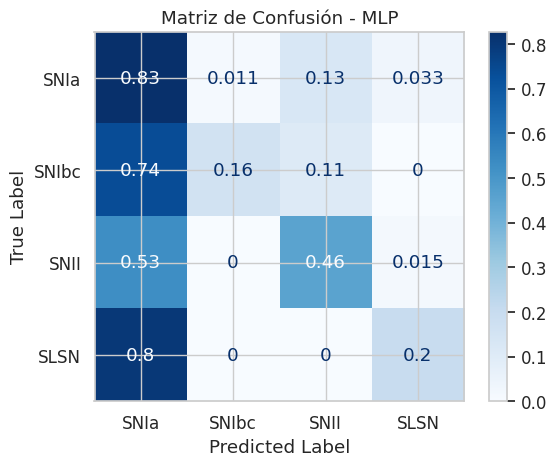

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, precision_score, recall_score,
    confusion_matrix, ConfusionMatrixDisplay
)

# Evaluación del modelo
net.eval()
with torch.no_grad():
    predict_out = net(test_X_t.to(device))
    _, predict_y = torch.max(predict_out, 1)

# Convertir a NumPy
true_y = test_y_t.cpu().numpy()
pred_y = predict_y.cpu().numpy()

# Calcular métricas
acc = accuracy_score(true_y, pred_y)
bacc = balanced_accuracy_score(true_y, pred_y)
prec = precision_score(true_y, pred_y, average="macro")
rec = recall_score(true_y, pred_y, average="macro")

print(f"Accuracy: {acc:.4f}  |  Balanced Acc.: {bacc:.4f}\n")

print("Reporte de clasificación:")
print(classification_report(y_test, pred_y, digits=4))

# Matriz de confusión
cm = confusion_matrix(true_y, pred_y, normalize='true')
label_dict = {'SNIa': 0, 'SNIbc': 1, 'SNII': 2, 'SLSN': 3}
class_names = list(label_dict.keys())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - MLP')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


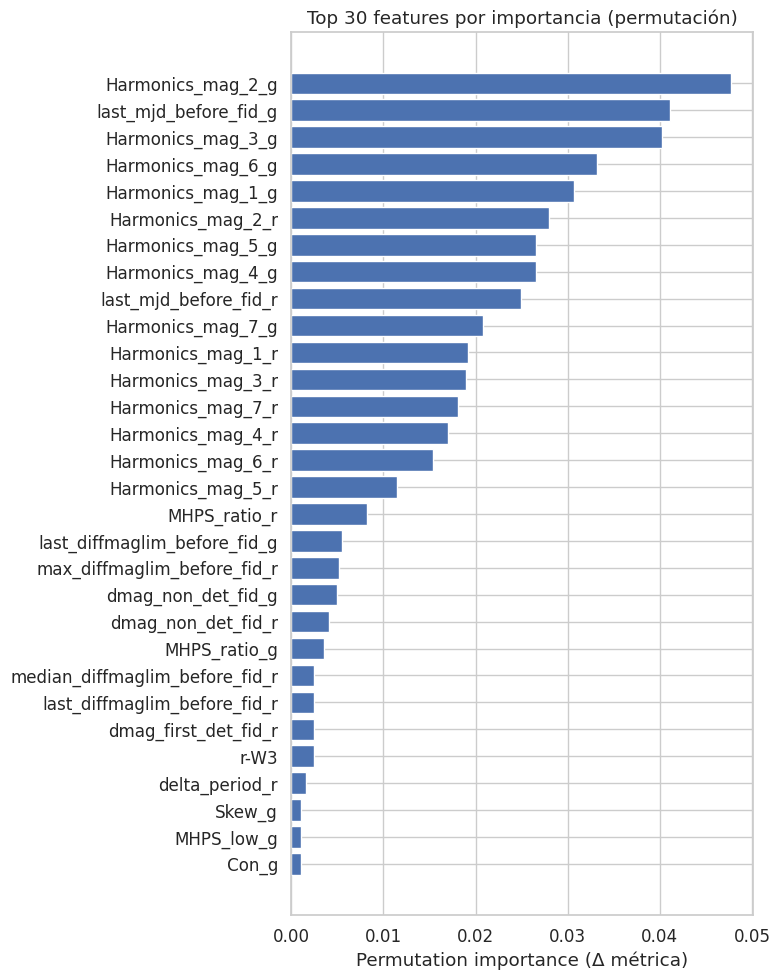

                           feature  importance  abs_importance
0                Harmonics_mag_2_g    0.047671        0.047671
1            last_mjd_before_fid_g    0.041096        0.041096
2                Harmonics_mag_3_g    0.040274        0.040274
3                Harmonics_mag_6_g    0.033151        0.033151
4                Harmonics_mag_1_g    0.030685        0.030685
5                Harmonics_mag_2_r    0.027945        0.027945
6                Harmonics_mag_4_g    0.026575        0.026575
7                Harmonics_mag_5_g    0.026575        0.026575
8            last_mjd_before_fid_r    0.024932        0.024932
9                Harmonics_mag_7_g    0.020822        0.020822
10               Harmonics_mag_1_r    0.019178        0.019178
11               Harmonics_mag_3_r    0.018904        0.018904
12               Harmonics_mag_7_r    0.018082        0.018082
13               Harmonics_mag_4_r    0.016986        0.016986
14               Harmonics_mag_6_r    0.015342        0

In [38]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

def calculate_permutation_importance(
    model, X_test, y_test, metric_fn=accuracy_score,
    feature_names=None, n_repeats=10, seed=42, device=None
):
    """
    Acepta X_test / y_test como numpy o torch.Tensor.
    Devuelve un DataFrame con 'feature', 'importance', 'abs_importance' (ordenado desc).
    """
    model.eval()
    if device is None:
        device = next(model.parameters()).device


    if isinstance(X_test, np.ndarray):
        X_test_t = torch.from_numpy(X_test).float().to(device)
    elif isinstance(X_test, torch.Tensor):
        X_test_t = X_test.to(device).float()
    else:
        raise TypeError("X_test debe ser numpy.ndarray o torch.Tensor")

    if isinstance(y_test, np.ndarray):
        y_test_t = torch.from_numpy(y_test).long().to(device)
    elif isinstance(y_test, torch.Tensor):
        y_test_t = y_test.to(device).long()
    else:
        raise TypeError("y_test debe ser numpy.ndarray o torch.Tensor")


    with torch.no_grad():
        logits = model(X_test_t)
        y_pred = logits.argmax(1).cpu().numpy()
    y_true = y_test_t.detach().cpu().numpy()
    baseline = metric_fn(y_true, y_pred)

    N, D = X_test_t.shape
    if feature_names is None:
        feature_names = [f"feature_{i}" for i in range(D)]

    rng = torch.Generator(device=device)
    rng.manual_seed(seed)

    importances = np.zeros(D, dtype=np.float32)

    with torch.no_grad():
        for j in range(D):
            drops = []
            for _ in range(n_repeats):
                Xp = X_test_t.clone()
                idx = torch.randperm(N, generator=rng, device=device)
                Xp[:, j] = Xp[idx, j]
                yp = model(Xp).argmax(1).cpu().numpy()
                score_p = metric_fn(y_true, yp)
                drops.append(baseline - score_p)
            importances[j] = float(np.mean(drops))

    df = pd.DataFrame({
        "feature": feature_names,
        "importance": importances,
        "abs_importance": np.abs(importances)
    }).sort_values("importance", ascending=False).reset_index(drop=True)
    return df


device = next(net.parameters()).device
feature_names = lc_feat.columns[1:-1].tolist()
imp_df = calculate_permutation_importance(
    net, test_X_t, test_y_t,
    metric_fn=accuracy_score,
    feature_names=feature_names,
    n_repeats=10, seed=42, device=device
)


top_k = 30
top_df = imp_df.head(top_k).copy()
top_df_sorted_for_plot = top_df.sort_values("importance", ascending=True)

plt.figure(figsize=(8, 10))
plt.barh(top_df_sorted_for_plot["feature"], top_df_sorted_for_plot["importance"])
plt.xlabel("Permutation importance (Δ métrica)")
plt.title(f"Top {top_k} features por importancia (permutación)")
plt.tight_layout()
plt.show()

print(top_df)


# Outliers

In [ ]:
# Faltan cosillas outliers